In [45]:
import ipywidgets as widgets
import os, json, torch, pickle
import numpy as np
import vosk
import soundfile as sf
from transformers import Wav2Vec2ForCTC, Wav2Vec2Processor
import torchaudio
import sounddevice as sd
from scipy.io.wavfile import write, read
import ipywidgets as widgets
from IPython.display import display, Audio
from tqdm import tqdm
from pydub.playback import play
from pydub import AudioSegment
import soundfile as sf
import wave
import librosa
from torch.utils.data import Dataset, DataLoader
from collections import Counter
import json
from transformers import Wav2Vec2Processor, Wav2Vec2FeatureExtractor, Wav2Vec2CTCTokenizer
import matplotlib.pyplot as plt


## Create module for recording audio

In [3]:
duration = 5
sample_rate = 44100

# Global variables for recording
recording_event = None
recording = None

def start_recording(button):
    global recording_event
    print("Recording...")
    recording_event = sd.rec(int(duration * sample_rate), samplerate=sample_rate, channels=2, dtype='int16')
    sd.wait()  # Wait until recording is finished

def stop_recording(button):
    global recording, recording_event
    sd.stop()
    recording = recording_event.copy()
    print("Recording stopped.")

def play_audio(button):
    if recording is not None:
        print("Playing recording...")
        sd.play(recording, samplerate=sample_rate)
        sd.wait()  # Wait until playback is finished
        print("Playback finished.")
    else:
        print("No recording available to play.")

def save_audio(button):
    global recording
    output_directory = "D:/Coding Projects/OJT2/tagalog/dataset_audio/inputs"    
    if not os.path.exists(output_directory):
        num_audio_files = 0
    else:
        num_audio_files = len([name for name in os.listdir(output_directory) if os.path.isfile(os.path.join(output_directory, name))])
    
    num_str = f"{num_audio_files+1:04}"  # Adjust 4 as needed for more digits
    output_filename = f"res_{num_str}.wav"
    
    if recording is not None:
        os.makedirs(output_directory, exist_ok=True)
        
        output_file_path = os.path.join(output_directory, output_filename)
        
        save_recording(output_file_path, recording)
        
        print(f"Audio saved to {output_file_path}")
    else:
        print("No recording available to save.")

def save_recording(filename, data):
    # Write the recorded data to a WAV file
    with wave.open(filename, 'w') as wf:
        wf.setnchannels(2)
        wf.setsampwidth(2)  # 16-bit audio
        wf.setframerate(sample_rate)
        wf.writeframes(data.tobytes())


In [7]:
start_button = widgets.Button(description="Start Recording")
stop_button = widgets.Button(description="Stop Recording")
play_button = widgets.Button(description="Play Recording")
save_button = widgets.Button(description="Save Recording")

# Assign functions to buttons
start_button.on_click(start_recording)
stop_button.on_click(stop_recording)
play_button.on_click(play_audio)
save_button.on_click(save_audio)

# Display buttons
display(start_button)
display(stop_button)
display(play_button)
display(save_button)

Button(description='Start Recording', style=ButtonStyle())

Button(description='Stop Recording', style=ButtonStyle())

Button(description='Play Recording', style=ButtonStyle())

Button(description='Save Recording', style=ButtonStyle())

Recording...
Recording stopped.
Recording stopped.
Audio saved to D:/Coding Projects/OJT2/tagalog/dataset_audio/inputs\res_0001.wav
Recording...
Recording stopped.
Audio saved to D:/Coding Projects/OJT2/tagalog/dataset_audio/inputs\res_0002.wav
Recording...
Recording stopped.
Audio saved to D:/Coding Projects/OJT2/tagalog/dataset_audio/inputs\res_0003.wav
Recording...
Recording stopped.
Audio saved to D:/Coding Projects/OJT2/tagalog/dataset_audio/inputs\res_0004.wav
Recording...
Recording stopped.
Audio saved to D:/Coding Projects/OJT2/tagalog/dataset_audio/inputs\res_0005.wav
Recording...
Recording stopped.
Audio saved to D:/Coding Projects/OJT2/tagalog/dataset_audio/inputs\res_0006.wav
Recording...
Recording stopped.
Audio saved to D:/Coding Projects/OJT2/tagalog/dataset_audio/inputs\res_0007.wav
Recording...
Recording stopped.
Audio saved to D:/Coding Projects/OJT2/tagalog/dataset_audio/inputs\res_0008.wav
Recording...
Recording stopped.
Audio saved to D:/Coding Projects/OJT2/tagalo

### Record your audio

### Test your audio

In [8]:
audio_dir = 'D:/Coding Projects/OJT2/tagalog/dataset_audio/inputs'
num_audio_files = len([name for name in os.listdir(audio_dir) if os.path.isfile(os.path.join(audio_dir, name))])

audio_files = []
for i in range(num_audio_files):
    num_str = f"{i+1:04}"
    audio_path = os.path.join(audio_dir, f'res_{num_str}.wav')
    audio_files.append(audio_path)
    
audio_files

['D:/Coding Projects/OJT2/tagalog/dataset_audio/inputs\\res_0001.wav',
 'D:/Coding Projects/OJT2/tagalog/dataset_audio/inputs\\res_0002.wav',
 'D:/Coding Projects/OJT2/tagalog/dataset_audio/inputs\\res_0003.wav',
 'D:/Coding Projects/OJT2/tagalog/dataset_audio/inputs\\res_0004.wav',
 'D:/Coding Projects/OJT2/tagalog/dataset_audio/inputs\\res_0005.wav',
 'D:/Coding Projects/OJT2/tagalog/dataset_audio/inputs\\res_0006.wav',
 'D:/Coding Projects/OJT2/tagalog/dataset_audio/inputs\\res_0007.wav',
 'D:/Coding Projects/OJT2/tagalog/dataset_audio/inputs\\res_0008.wav',
 'D:/Coding Projects/OJT2/tagalog/dataset_audio/inputs\\res_0009.wav']

In [9]:
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h")
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h")

def show_transcription(model, processor, audio_file):
    audio_input, sampling_rate = librosa.load(audio_file, sr=16000)
    inputs = processor(audio_input, sampling_rate=sampling_rate, return_tensors="pt", padding=True)
    with torch.no_grad():
        logits = model(inputs.input_values).logits

    predicted_ids = torch.argmax(logits, dim=-1)
    transcription = processor.batch_decode(predicted_ids)
    print(transcription)
    
for audio_file in audio_files:
    show_transcription(model, processor, audio_file)

Some weights of the model checkpoint at facebook/wav2vec2-large-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You s

['DAHIL SAGUMWOR']
['DAT HEELSON GUMBE']
['DAHISAGAMMUT']
['MINOTO NACOLYPAS']
['MINU DO NAPOLEPAS']
['MINU DOM NACOLIPAS']
['BEAR DA']
['BEAR DICK']
['DARE DE']


## Prepare dataset for fine-tuning

In [12]:
def getFileNames(audio_dir, isWav):
    num_files = len([name for name in os.listdir(audio_dir) if os.path.isfile(os.path.join(audio_dir, name))])

    files = []
    for i in range(num_files):
        num_str = f"{i+1:04}"
        if isWav:
            path = os.path.join(audio_dir, f'res_{num_str}.wav')
        else:
            path = os.path.join(audio_dir, f'res_{num_str}.txt')

        files.append(path)

    return files

audio_dir = 'D:/Coding Projects/OJT2/tagalog/dataset_audio_female'
listFemaleAudio = getFileNames(audio_dir, True)
audio_dir = 'D:/Coding Projects/OJT2/tagalog/dataset_audio_child'
listChildAudio = getFileNames(audio_dir, True)
audio_dir = 'D:/Coding Projects/OJT2/tagalog/dataset_audio_male'
listMaleAudio = getFileNames(audio_dir, True)
audio_dir = 'D:/Coding Projects/OJT2/tagalog/dataset_text'
listAudioLabels = getFileNames(audio_dir, False)

In [32]:
class AudioDataset(Dataset):
    def __init__(self, audio_files, label_files, processor):
        self.audio_files = audio_files
        self.label_files = label_files
        self.processor = processor

    def __len__(self):
        return len(self.audio_files)

    def __getitem__(self, idx):
        audio_file = self.audio_files[idx]
        label_file = self.label_files[idx]

        # Load audio file
        audio_input, sampling_rate = librosa.load(audio_file, sr=16000)
        
        # Load transcription
        with open(label_file, 'r', encoding='utf-8') as f:
            transcription = f.readline().strip()

        # Process audio input and transcription
        inputs = self.processor(audio_input, sampling_rate=sampling_rate, return_tensors="pt")
        with self.processor.as_target_processor():
            labels = self.processor(transcription, return_tensors="pt").input_ids

        return {
            'input_values': inputs.input_values[0],  # Flatten the input tensor
            'labels': labels[0]  # Flatten the label tensor
        }
    
def collate_fn(batch):
    input_values = [item['input_values'] for item in batch]
    labels = [item['labels'] for item in batch]

    # Ensure input_values is a dictionary with the correct key for padding
    processed_inputs = {"input_values": input_values}

    # Pad inputs
    input_values_padded = processor.feature_extractor.pad(processed_inputs, padding=True, return_tensors="pt").input_values

    # Pad labels
    with processor.as_target_processor():
        labels_padded = processor.pad({"input_ids": labels}, padding=True, return_tensors="pt").input_ids

    return {
        'input_values': input_values_padded,
        'labels': labels_padded
    }

In [14]:
all_audio_files = listFemaleAudio + listChildAudio + listMaleAudio
all_label_files = listAudioLabels + listAudioLabels + listAudioLabels

In [36]:
def extract_vocabulary(label_files):
    counter = Counter()
    for label_file in label_files:
        with open(label_file, 'r', encoding='utf-8') as f:
            transcription = f.readline().strip()
            counter.update(transcription)
    return counter

vocabulary_counter = extract_vocabulary(all_label_files)

# Get the sorted list of unique tokens
vocab_list = sorted(vocabulary_counter.keys())
vocab_list = ["<pad>", "<unk>"] + vocab_list  # Add special tokens

# Create a vocabulary dictionary
vocab_dict = {char: i for i, char in enumerate(vocab_list)}

with open("tagalog/vocab/vocab.json", 'w', encoding='utf-8') as f:
    json.dump(vocab_dict, f)

In [37]:
merges = ["#version: 0.2", "a e", "b e"]  # Dummy merges for demonstration
with open("tagalog/vocab/merges.txt", 'w', encoding='utf-8') as f:
    f.write("\n".join(merges))

# Create the tokenizer
tokenizer = Wav2Vec2CTCTokenizer("tagalog/vocab/vocab.json", "tagalog/vocab/merges.txt")
tokenizer.save_pretrained("tagalog/vocab/tokenizer")

('tagalog/vocab/tokenizer\\tokenizer_config.json',
 'tagalog/vocab/tokenizer\\special_tokens_map.json',
 'tagalog/vocab/tokenizer\\vocab.json',
 'tagalog/vocab/tokenizer\\added_tokens.json')

In [38]:
tokenizer = Wav2Vec2CTCTokenizer("tagalog/vocab/vocab.json", "tagalog/vocab/merges.txt")
feature_extractor = Wav2Vec2FeatureExtractor(feature_size=1, sampling_rate=16000, padding_value=0.0, 
                                             do_normalize=True, return_attention_mask=False)
processor = Wav2Vec2Processor(feature_extractor=feature_extractor, tokenizer=tokenizer)
# processor = Wav2Vec2Processor.from_pretrained("tagalog/vocab/processor")

In [40]:
with open("tagalog/vocab/vocab.json", 'r', encoding='utf-8') as f:
    vocab = json.load(f)
print(f"Vocabulary size: {len(vocab)}")

Vocabulary size: 44


In [ ]:
dataset = AudioDataset(all_audio_files, all_label_files, processor)
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, collate_fn=collate_fn)
optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)

In [41]:
for batch in dataloader:
    labels = batch['labels']
    print(labels)
    print(f"Max label value: {labels.max().item()}")
    break  # Check the first batch for now

tensor([[26, 27, 25, 27, 37,  1, 36, 19,  1, 12, 18,  0,  0,  0,  0,  0,  0,  0],
        [26, 27, 32, 22, 27,  1, 29, 33,  1, 32, 19, 20, 27, 30, 19, 32, 25,  0],
        [14,  1,  6,  1, 16,  1, 19, 35, 19, 40,  1, 30, 38, 31, 27, 34, 19, 36],
        [22, 27, 30, 19, 40,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])
Max label value: 40


In [42]:
# Load processor and model
processor = Wav2Vec2Processor.from_pretrained("facebook/wav2vec2-large-960h")
model = Wav2Vec2ForCTC.from_pretrained("facebook/wav2vec2-large-960h")

processor.tokenizer.vocab = vocab
processor.tokenizer.pad_token_id = processor.tokenizer.vocab["<pad>"]
processor.tokenizer.unk_token_id = processor.tokenizer.vocab["<unk>"]

# Update model config with new vocab size
model.config.vocab_size = len(vocab)

# Freeze feature extractor
model.freeze_feature_extractor()

# Move model to device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# Print model's vocabulary size
print(f"Model's vocabulary size: {model.config.vocab_size}")


Some weights of the model checkpoint at facebook/wav2vec2-large-960h were not used when initializing Wav2Vec2ForCTC: ['wav2vec2.encoder.pos_conv_embed.conv.weight_g', 'wav2vec2.encoder.pos_conv_embed.conv.weight_v']
- This IS expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing Wav2Vec2ForCTC from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of Wav2Vec2ForCTC were not initialized from the model checkpoint at facebook/wav2vec2-large-960h and are newly initialized: ['wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original0', 'wav2vec2.encoder.pos_conv_embed.conv.parametrizations.weight.original1', 'wav2vec2.masked_spec_embed']
You s

Model's vocabulary size: 44


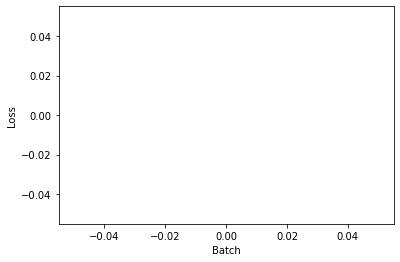

In [47]:
# Define parameters
num_epochs = 2
early_stop_patience = 5
early_stop_min_delta = 0.01
plot_update_interval = 10  # Update plot every 10 batches

# Initialize variables
train_losses = []
best_loss = float('inf')
patience_counter = 0

# Create a plot
plt.ion()
fig, ax = plt.subplots()
ax.set_xlabel('Batch')
ax.set_ylabel('Loss')
line, = ax.plot([], [])

def update_plot(losses):
    line.set_xdata(np.arange(len(losses)))
    line.set_ydata(losses)
    ax.relim()
    ax.autoscale_view()
    fig.canvas.draw()
    fig.canvas.flush_events()

In [49]:
for epoch in range(num_epochs):
    model.train()
    epoch_train_loss = 0

    for i, batch in enumerate(dataloader):
        input_values = batch['input_values'].to(device)
        labels = batch['labels'].to(device)

        # Forward pass
        outputs = model(input_values, labels=labels)
        loss = outputs.loss
        print(f"epoch-{epoch}-{i}, loss: {loss}")

        if torch.isnan(loss):
            print("Encountered nan loss. Skipping this batch.")
            continue

        # Backward pass and optimization
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_train_loss += loss.item()

        # Update plot periodically
        if i % plot_update_interval == 0:
            train_losses.append(loss.item())
            update_plot(train_losses)

    epoch_train_loss /= len(dataloader)
    train_losses.append(epoch_train_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_train_loss}")

    # Early stopping check
    if epoch_train_loss < best_loss - early_stop_min_delta:
        best_loss = epoch_train_loss
        patience_counter = 0
    else:
        patience_counter += 1
        if patience_counter >= early_stop_patience:
            print("Early stopping triggered")
            break

# Save final training history and plot
np.save('training_history.npy', train_losses)
# plt.ioff()
# plt.show()
# plt.savefig('training_loss_history.png')

epoch-0-0, loss: 337.3292541503906
epoch-0-1, loss: 243.8156280517578
epoch-0-2, loss: 268.7986755371094
epoch-0-3, loss: 535.9157104492188
epoch-0-4, loss: 349.19891357421875
epoch-0-5, loss: 621.0836791992188
epoch-0-6, loss: 445.4817199707031
epoch-0-7, loss: 409.76177978515625
epoch-0-8, loss: 448.81256103515625
epoch-0-9, loss: 358.7918701171875
epoch-0-10, loss: 255.58071899414062
epoch-0-11, loss: 331.04437255859375
epoch-0-12, loss: 445.2557067871094
epoch-0-13, loss: 400.39398193359375
epoch-0-14, loss: 548.461669921875
epoch-0-15, loss: 401.91717529296875
epoch-0-16, loss: 184.832275390625
epoch-0-17, loss: 343.64501953125
epoch-0-18, loss: 264.36822509765625
epoch-0-19, loss: 716.1574096679688
epoch-0-20, loss: 250.4633026123047
epoch-0-21, loss: 490.98760986328125
epoch-0-22, loss: 375.11212158203125
epoch-0-23, loss: 518.435546875
epoch-0-24, loss: 403.460205078125
epoch-0-25, loss: 208.78196716308594
epoch-0-26, loss: 451.1076354980469
epoch-0-27, loss: 633.6185913085938


epoch-1-18, loss: 306.5285339355469
epoch-1-19, loss: 246.9820556640625
epoch-1-20, loss: 405.2588806152344
epoch-1-21, loss: 371.5379638671875
epoch-1-22, loss: 290.7222900390625
epoch-1-23, loss: 352.49932861328125
epoch-1-24, loss: 354.72509765625
epoch-1-25, loss: 431.9010925292969
epoch-1-26, loss: 542.3580322265625
epoch-1-27, loss: 621.3250122070312
epoch-1-28, loss: 243.7618865966797
epoch-1-29, loss: 804.6598510742188
epoch-1-30, loss: 438.4464111328125
epoch-1-31, loss: 439.2069091796875
epoch-1-32, loss: 357.60601806640625
epoch-1-33, loss: 316.75787353515625
epoch-1-34, loss: 381.14947509765625
epoch-1-35, loss: 397.51885986328125
epoch-1-36, loss: 285.308837890625
epoch-1-37, loss: 603.7874145507812
epoch-1-38, loss: 406.6072692871094
epoch-1-39, loss: 314.77984619140625
epoch-1-40, loss: 535.7777709960938
epoch-1-41, loss: 337.3028869628906
epoch-1-42, loss: 244.92782592773438
epoch-1-43, loss: 615.6409301757812
epoch-1-44, loss: 712.5552978515625
epoch-1-45, loss: 622.65

<Figure size 432x288 with 0 Axes>

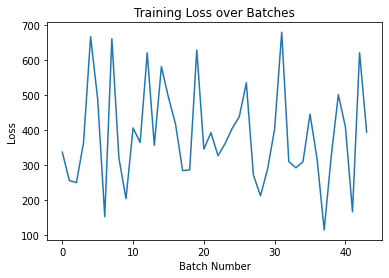

In [51]:
plt.plot(train_losses)
plt.xlabel('Batch Number')
plt.ylabel('Loss')
plt.title('Training Loss over Batches')
plt.show()

In [52]:
for audio_file in audio_files:
    show_transcription(model, processor, audio_file)

['TSO O']
['THEHESO TH']
['THA ISO BEOT']
['A']
['OTNAPOLEIPAS']
['E']
['DA AY']
['DERE DER']
['R']


In [ ]:
# # Training loop
# for batch in dataloader:
#     input_values = batch['input_values'].to(device)
#     labels = batch['labels'].to(device)

#     # Print labels and check if any exceed the vocab size
#     print(f"Labels: {labels}, Len(Labels): {len(labels)} ")
#     print(f"Max label value: {labels.max().item()}")

#     # Forward pass
#     outputs = model(input_values, labels=labels)
#     loss = outputs.loss

#     if torch.isnan(loss):
#         print("Encountered nan loss. Skipping this batch.")
#         continue

#     # Backward pass and optimization
#     optimizer.zero_grad()
#     loss.backward()
#     optimizer.step()
    
#     print(f"Loss: {loss.item()}")

In [ ]:
# # Training loop example
# for epoch in range(3):
#     for batch in dataloader:
#         input_values, labels = batch

#         optimizer.zero_grad()
#         outputs = model(input_values, labels=labels)
#         loss = outputs.loss

#         loss.backward()
#         optimizer.step()